# IMDB Movies Data Analysis and Prediction

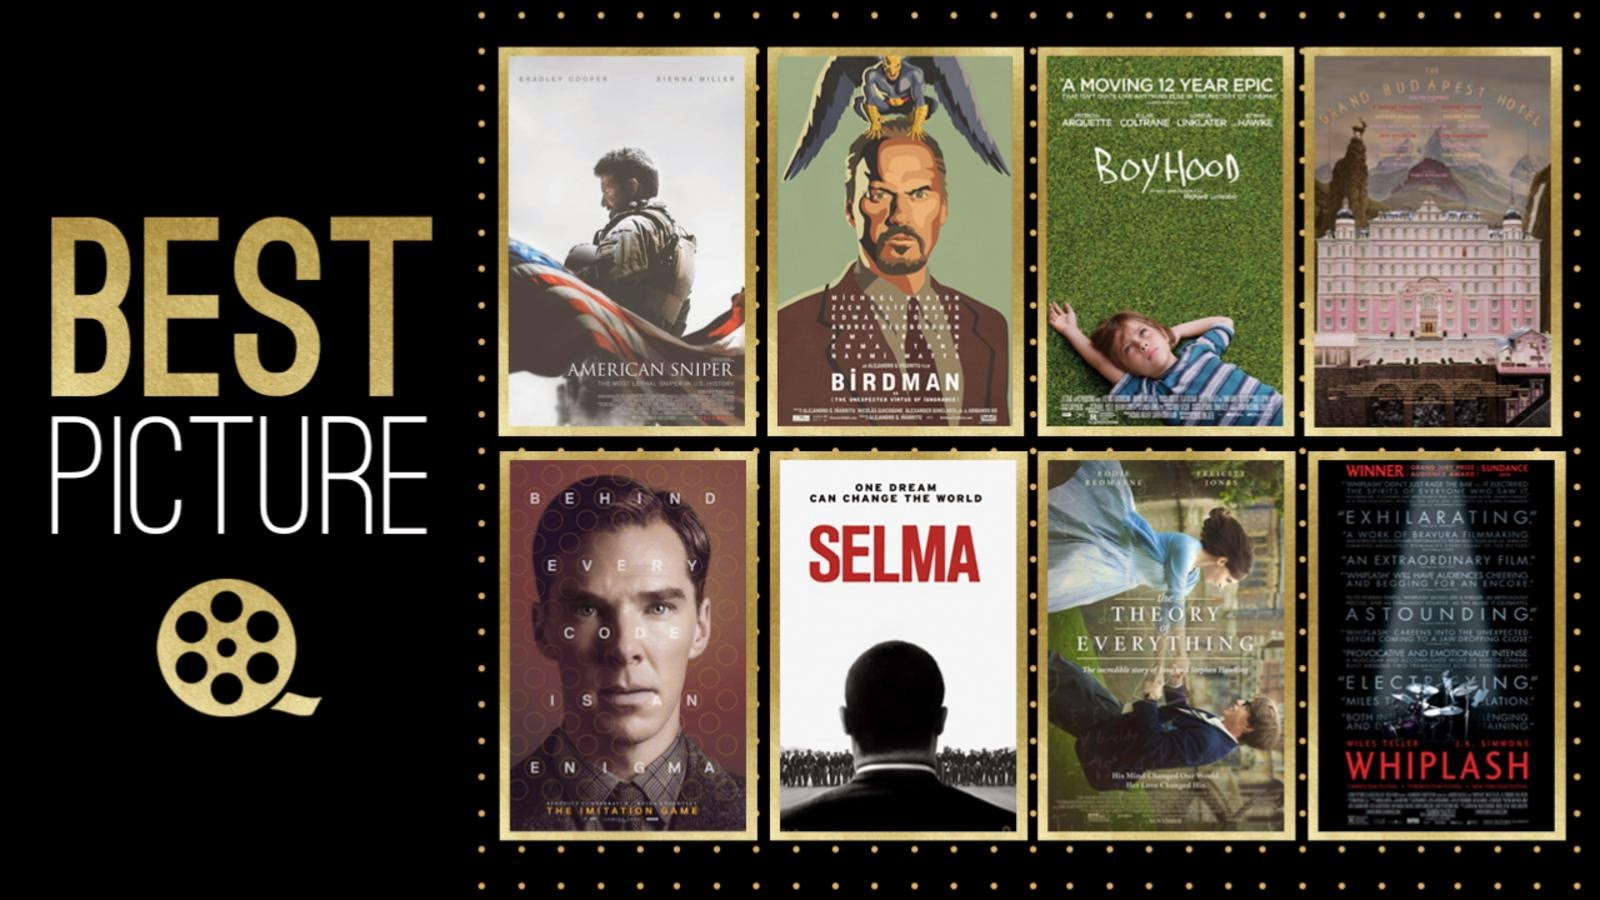

In [1]:
from IPython.display import Image
Image(filename='image.jpg') 

# Scraping Movie Ids from imdb Website

In [ ]:
#################################################################################################
#This part of code gets all the movie ids of feature films fom year 1990 to 2017. The  advanced search of imdb allows us to 
#scarpe maximum of 10,000 movie ids and titles, eventhough the site shows the comprehensive list of all movies ids and titles 
# from the year 1990 to 2017 ~ 140k movies. To overcome this limitations, we queried IMDB for movies id and titles for each 
# month and each year. Finally we could extract 140k movies pertainting to various countries and languages. There is license agreement
#which should be followed while scraping. We have sent a mail to imdb to to give us permission to analyze imdb movie data strictly for 
#educational purposes. The code took 3.5 hours to scrape the 140k titles and ids of movies. Some part of the code is removed due to 
#legal reasons. The data extracted is used strictly for educational purposes.
####################################################################################################
"""import urllib2
import bs4
import sys
import time
import json
import utilities
import pandas as pd

movie_ids =[]
movie_names = []

startyear = 1990
endyear = 2017
for year in range(startyear,endyear):
    for month in range(1,12):
        month_next = month + 1
        month = "%02d" % (month,)
        month_next = "%02d" % (month_next,)
        url = "http://www.imdb.com/search/title?release_date=" + str(year) +"-" + str(month)+ "-01" + "," + str(year)+"-"+ str(month_next)+ "-01" + "%20&title_type=feature&page=1&ref_=adv_nxt"
        #print(url)
        html = urllib2.urlopen(url).read()
        .....................................................................
        span = soup.findAll("div", { "class" : "desc" })
        #print("#########################################################################################################################################")
        num_titles = utilities.find_between( str(span), "of", "titles" )
        #print(num_titles)
        num_pages = utilities.num_pages(num_titles,50)
        #print(num_pages)
        
        for page in range(1,num_pages+1):
            url = "http://www.imdb.com/search/title?release_date=" + str(year) +"-" + str(month)+ "-01" + "," + str(year)+"-"+ str(month_next)+ "-01" + "%20&title_type=feature&page="+str(page)+"&ref_=adv_nxt"
            #print(url)
            html = urllib2.urlopen(url).read()
            soup = bs4.BeautifulSoup(html, "html.parser")
            ......................................................
            if myspans == "":
                print("empty")
            #print(myspans)
            soup1 = bs4.BeautifulSoup(str(myspans),"html.parser")
           .........................................................
            #print(myspans_a)
            for i in myspans_a:
                atag = str(i)
                movie_name = atag[43:]
                movie_name = movie_name[:-4]
                #print(movie_name)
                movie_names.append(movie_name)
                #print(atag[16:25])
                movie_ids.append(atag[16:25])
        
        if month == "11":
            if year != 2016:
                url = "http://www.imdb.com/search/title?release_date=" + str(year) +"-" + str(month_next)+ "-01" + "," + str(year)+"-"+ str(month_next)+ "-31" + "%20&title_type=feature&page=1&ref_=adv_nxt"
                #print(url)
                html = urllib2.urlopen(url).read()
                soup = bs4.BeautifulSoup(html, "html.parser")
                span = soup.findAll("div", { "class" : "desc" })
                ...........................................................
                num_pages = utilities.num_pages(num_titles,50)
                for page in range(1,num_pages+1):
                    url = "http://www.imdb.com/search/title?release_date=" + str(year) +"-" + str(month_next)+ "-01" + "," + str(year)+"-"+ str(month_next)+ "-31" + "%20&title_type=feature&page="+str(page)+"&ref_=adv_nxt"
                    html = urllib2.urlopen(url).read()
                    soup = bs4.BeautifulSoup(html, "html.parser")
                    ............................................................
                    if myspans == "":
                        print("empty")
                    ...........................................................
                    myspans_a = soup1.find_all('a')
                    for i in myspans_a:
                        atag = str(i)
                        .................
                        .................
                        .................
                        ...................
                        ................
movie_list = pd.DataFrame(
    {'movie_id': movie_ids,
     'movie_name': movie_names,
    })
movie_list.to_csv('movieids.csv')"""

########################################################################################################################

In [2]:
import pandas as pd
movie_ids = pd.read_csv("movies_ids.csv",encoding='ISO-8859-1' ,dtype ="str")
print(movie_ids.shape)
movie_ids.head()
#summary(movie_ids)

(139732, 2)


,movie_id,movie_name
0,tt0015724,Dama de noche
1,tt0035423,Kate &amp; Leopold
2,tt0057973,Cr\xf4nica da Cidade Amada
3,tt0059900,"Wenn du gro\xdf bist, lieber Adam"
4,tt0064994,Skriv\xe1nci na niti


# Scraping various Attributes of each movie from IMDB website

In [4]:
# We have extracted various attributes like "Movie_title, year_released, duration of the movie, ratings, meta score, 
# directors and actors etc" using "Beautiful Soup and lxml.html parsers". The data extraction took us amlost 5 days of time
# because there is a limit on the max number of requests per day for a particular IP address. 
import sys
import re
import time
import scrapy
import random
import json
import locale
import urllib3
import lxml.html
from bs4 import BeautifulSoup
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import requests

#url ="http://www.imdb.com/title/tt0816692/" + "?ref_=nv_sr_1"
url ="http://www.imdb.com/title/tt0499549/" + "?ref_=nv_sr_1"
response = lxml.html.document_fromstring(requests.get(url).content)
movie = {}
try:
    movie['title'] =  response.xpath('//div[@class="title_wrapper"]/h1/text()')[0].strip()
    #print(title)
except IndexError:
    movie['title'] =""

try:
    movie['year_released'] = response.xpath('//div[@class="title_wrapper"]/h1/span[1]/a/text()')[0].strip()
except IndexError:
    movie['year_released'] =""
    
try:
    movie['movie_duration'] = response.xpath('//div[@class="title_wrapper"]/div[1]/time/text()')[0].strip()
except IndexError:
    movie['movie_duration'] =""

try:
    movie['release_date'] = response.xpath('//div[@class="title_wrapper"]/div[1]/a/text()')[0].strip()
except IndexError:
    movie['release_date'] =""
#genre = response.xpath('//div[@class="title_wrapper"]/div[1]/a/span/text()')
#print(genre)
try:
    movie['certification'] = response.xpath('//div[@class="title_wrapper"]/div[1]/meta/@content')
except IndexError:
    movie['certification'] =""

try:
    movie['rating'] = response.xpath('//div[@class="ratingValue"]/strong/span/text()')[0].strip()
except IndexError:
    movie['rating'] =""
    
try:
    movie['ratingCount'] = response.xpath('//div[@class="imdbRating"]/a/span/text()')[0].strip()
except IndexError:
    movie['ratingCount'] =""
    
try:
    movie['rating_users'] = response.xpath('//div[@class="hiddenImportant"]/span[1]/text()')[0].strip()
except IndexError:
    movie['rating_users'] =""
    
try:
    movie['rating_critics'] = response.xpath('//div[@class="hiddenImportant"]/span[2]/text()')[0].strip()
except IndexError:
    movie['rating_critics'] =""
    
try:
    movie['description'] = response.xpath('//div[@class="summary_text"]/text()')[0].strip()
except IndexError:
    movie['description'] =""
    
try:
    movie['metaScore'] = response.xpath('//div[@class="metacriticScore score_favorable titleReviewBarSubItem"]/span/text()')[0].strip()
except IndexError:
    movie['metaScore'] =""
    
try:
    Oscars = response.xpath('//div[@id="titleAwardsRanks"]/span[1]/b/text()')[0].strip()
    Oscars = Oscars.replace("\n"," ")
    movie['Oscars'] = ' '.join(Oscars.split())
except IndexError:
    movie['Oscars'] =""
    
try:
    Other_awards = response.xpath('//div[@id="titleAwardsRanks"]/span[2]/text()')[0].strip()
    movie['Other_awards'] = ' '.join(Other_awards.split())
except IndexError:
    movie['Other_awards'] =""
    
try:
    movie['KeyWords'] = response.xpath('//div[@class="see-more inline canwrap"]/a/span/text()')
except IndexError:
    movie['KeyWords'] =""
    
try:
    movie['Genres'] = response.xpath('//div[@itemprop="genre"]/a/text()')
except IndexError:
    movie['Genres'] =""
    
try:
    movie['Directors'] = response.xpath('//span[@itemprop="director"]/a/span/text()')
except IndexError:
    movie['Directors'] =""

try:
    writer1 = response.xpath('//div[@class="credit_summary_item"]/span/a/span/text()')[1].strip()
except IndexError:
    writer1 =""

try:
    writer2 = response.xpath('//div[@class="credit_summary_item"]/span/a/span/text()')[2].strip()
except IndexError:
    writer2 =""

movie['Writers'] =""
Writers = []
Writers.append(writer1)
Writers.append(writer2)
movie['Writers'] = Writers
    
try:
    actor1 = response.xpath('//div[@class="credit_summary_item"]/span/a/span/text()')[3].strip()
except IndexError:
    actor1 =""

try:
    actor2 = response.xpath('//div[@class="credit_summary_item"]/span/a/span/text()')[4].strip()
except IndexError:
    actor2 =""

try:
    actor3 = response.xpath('//div[@class="credit_summary_item"]/span/a/span/text()')[5].strip()
except IndexError:
    actor3 =""
    
movie['Actors_Main'] =""
Actors_Main = []
Actors_Main.append(actor1)
Actors_Main.append(actor2)
Actors_Main.append(actor3)
movie['Actors_Main'] = Actors_Main


try:
    movie['Gallery']= response.xpath('//div[@class="mediastrip"]/a/img/@src')    
except IndexError:   
    movie['Gallery'] =""

try:
    movie['storyline']=  response.xpath('//div[@class="inline canwrap"]/p/text()')[0].strip()   
except IndexError:   
    movie['storyline'] =""

try:
    movie['alsolikedmovies']= response.xpath('//div[@class="rec_item"]/a/img/@title')
except IndexError:   
    movie['alsolikedmovies'] =""

try:
    movie['titlecast']= response.xpath('//td[@class="itemprop"]/a/span/text()')
except IndexError:   
    movie['titlecast'] =""
    
try:
    likedmovies_ids = response.xpath('//div[@class="rec_item"]/a/@href')
    likedmovies_ids = ([s[8:16] for s in likedmovies_ids])
    movie['likedmovieids'] = likedmovies_ids
except IndexError:   
    movie['likedmovieids'] =""
    
movie['Country'] =""
movie['Language'] =""
movie['Release'] =""
movie['Also_Known_As'] =""
movie['Filming_locations'] =""
movie['Budget'] =""
movie['Opening_Weekend'] =""
movie['Runtime_min'] =""
movie['Sound_Mix'] =""
movie['Color'] =""
movie['Aspect_Ratio'] =""

for i in range(1,22):
    a = False
    b=0
    pointer = '//div[@id="titleDetails"]/div[' + str(i) + ']/h4/text()'
    #print(pointer)
    try:
        res = response.xpath(pointer)[0].strip()
    except IndexError:   
        a = True
        
    if a == False :
        if (response.xpath(pointer)[0].strip() =="Country:"):
            movie['Country']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/a/text()')
        elif (response.xpath(pointer)[0].strip()=="Language:"):
            movie['Language']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/a/text()')
        elif (response.xpath(pointer)[0].strip()=="Release Date:"):
            movie['Release']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/text()')[1].strip()
        elif (response.xpath(pointer)[0].strip()=="Also Known As:"):
            movie['Also_Known_As']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/text()')[1].strip()
        elif (response.xpath(pointer)[0].strip()=="Filming Locations:"):
            movie['Filming_locations']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/a/text()')
        elif (response.xpath(pointer)[0].strip()=="Budget:"):
            movie['Budget']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/text()')[1].strip()
        elif (response.xpath(pointer)[0].strip()=="Opening Weekend:"):
            #movie['Opening_Weekend']
            opening = response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/text()')[1].strip()
            opening= opening.replace('\n', ' ')
            opening = opening.split()
            try:
                opening_attr =  response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/span/text()')[0].strip()  
            except IndexError:   
                opening_attr = ""
            opening.append(opening_attr)
            movie['Opening_Weekend'] = opening
        elif (response.xpath(pointer)[0].strip()=="Gross:"):
            #movie['Gross']
            gross = response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/text()')[1].strip()
            try:
                gross_attr =  response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/span/text()')  
            except IndexError:   
                gross_attr = []
            gross_attr.insert(0, gross)
            movie['Gross'] = gross_attr
        elif (response.xpath(pointer)[0].strip()=="Runtime:"):
            movie['Runtime_min']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/time/text()')[0].strip()
        elif (response.xpath(pointer)[0].strip()=="Sound Mix:"):
            movie['Sound_Mix']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/a/text()')
        elif (response.xpath(pointer)[0].strip()=="Color:"):
            movie['Color']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/a/text()')
        elif (response.xpath(pointer)[0].strip()=="Aspect Ratio:"):
            movie['Aspect_Ratio']= response.xpath('//div[@id="titleDetails"]/div[' + str(i) + ']/text()')[1].strip()
        else:
            b = 10
################# Director ID##################
try:
    directoridlink = response.xpath('//div[@class="credit_summary_item"]/span/a/@href')[0].strip()
    movie["directorid"] = directoridlink[6:15]
except IndexError:
    movie["directorid"] =""



############### Extracting Writer ID's ###########################
try:
    writer1idlink = response.xpath('//div[@class="credit_summary_item"]/span/a/@href')[1].strip()
    writer1id = writer1idlink[6:15]
except IndexError:
    writer1id =""

try:
    writer2idlink = response.xpath('//div[@class="credit_summary_item"]/span/a/@href')[2].strip()
    writer2id = writer2idlink[6:15]
except IndexError:
    writer2id =""

Writersid = []
Writersid.append(writer1id)
Writersid.append(writer2id)
movie['Writersid'] = Writersid

####### Adding ids for Actor's names ##############################

try:
    actor1idlink = response.xpath('//div[@class="credit_summary_item"]/span/a/@href')[3].strip()
    actor1id = actor1idlink[6:15]
except IndexError:
    actor1id =""

try:
    actor2idlink = response.xpath('//div[@class="credit_summary_item"]/span/a/@href')[4].strip()
    actor2id = actor2idlink[6:15]
except IndexError:
    actor2id =""

try:
    actor3idlink = response.xpath('//div[@class="credit_summary_item"]/span/a/@href')[5].strip()
    actor3id = actor3idlink[6:15]
except IndexError:
    actor3id =""


Actors_Mainid = []
Actors_Mainid.append(actor1id)
Actors_Mainid.append(actor2id)
Actors_Mainid.append(actor3id)
movie['Actors_Mainid'] = Actors_Mainid

titlecast_ids = response.xpath('//td[@class="itemprop"]/a/@href')
movie['titlecastids'] = ([s[6:15] for s in titlecast_ids])

#########################################################
################# Code for getting Actor Names Facebook likes ##############################
#Input for the personids will be actors id, directors id, writers id



print(json.dumps(movie, indent=2))


{
  "Writers": [
    "James Cameron",
    "Sam Worthington"
  ],
  "titlecast": [
    "Sam Worthington",
    "Zoe Saldana",
    "Sigourney Weaver",
    "Stephen Lang",
    "Michelle Rodriguez",
    "Giovanni Ribisi",
    "Joel David Moore",
    "CCH Pounder",
    "Wes Studi",
    "Laz Alonso",
    "Dileep Rao",
    "Matt Gerald",
    "Sean Anthony Moran",
    "Jason Whyte",
    "Scott Lawrence"
  ],
  "Other_awards": "Another 80 wins & 121 nominations.",
  "directorid": "nm0000116",
  "metaScore": "83",
  "Color": [
    "Color"
  ],
  "Gross": [
    "$760,505,847",
    "(USA)",
    "(12 November 2010)"
  ],
  "titlecastids": [
    "nm0941777",
    "nm0757855",
    "nm0000244",
    "nm0002332",
    "nm0735442",
    "nm0000610",
    "nm0601376",
    "nm0001634",
    "nm0836071",
    "nm0022306",
    "nm2438307",
    "nm0313902",
    "nm1616211",
    "nm0926677",
    "nm0493013"
  ],
  "Opening_Weekend": [
    "\u00a38,509,050",
    "(UK)",
    "(18 December 2009)"
  ],
  "Language": [
  

In [6]:
movies_unclean = pd.read_csv("movies_unclean.csv", encoding='ISO-8859-1', dtype = "str" )
movies_unclean = movies_unclean.drop_duplicates()
print(movies_unclean.shape)
movies_unclean.head()
movies_unclean

(136509, 38)


,Actors_Main,Actors_Mainid,Also_Known_As,Aspect_Ratio,Budget,Color,Country,Directors,Filming_locations,Gallery,...,movie_duration,ratingCount,rating_critics,rating_users,release_date,storyline,title,titlecast,titlecastids,year_released
0,"Rafael Sánchez Navarro,Cecilia Toussaint,Migue...","nm0844752,nm0869732,nm0194720",Lady of the Night,1.33 : 1,NaN,Color,Mexico,Eva López Sánchez,"Mexico City, Distrito Federal, Mexico",http://ia.media-imdb.com/images/G/01/imdb/imag...,...,1h 42min,17,NaN,NaN,18 March 1993 (Mexico),NaN,Dama de noche,"Rafael Sánchez Navarro,Cecilia Toussaint,Migue...","nm0844752,nm0869732,nm0194720,nm0650495,nm0941...",1993
1,"Meg Ryan,Hugh Jackman,Liev Schreiber","nm0000212,nm0413168,nm0000630",Kate and Leopold,1.85 : 1,"$ 4,80,00,000",Color,USA,James Mangold,"Central Park, Manhattan, New York City, New Yo...",http://ia.media-imdb.com/images/G/01/imdb/imag...,...,1h 58min,"65,904",124 critic,317 user,25 December 2001 (USA),Kate and her actor brother live in N.Y. in the...,Kate & Leopold,"Meg Ryan,Hugh Jackman,Liev Schreiber,Breckin M...","nm0000212,nm0413168,nm0000630,nm0005227,nm0005...",2001
2,"Procópio Ferreira,Magalhães Graça,Jardel Filho","nm0274421,nm0337241,nm0276910",Crónica de la ciudad amada,2.35 : 1,NaN,Color,Brazil,Carlos Hugo Christensen,NaN,NaN,...,1h 50min,32,NaN,1 critic,17 November 1997 (Argentina),"Eleven small stories, loving chronicles about ...",Crônica da Cidade Amada,"Procópio Ferreira,Magalhães Graça,Jardel Filho...","nm0274421,nm0337241,nm0276910,nm0956247,nm0615...",1997
3,"Stephan Jahnke,Gerry Wolff,Manfred Krug","nm1052658,nm0937760,nm0472545","When You Grow Up, Dear Adam",2.35 : 1,NaN,Color,East Germany,Egon Günther,"Dresden, Saxony, Germany",http://ia.media-imdb.com/images/G/01/imdb/imag...,...,1h 18min,15,NaN,NaN,18 October 1990 (Germany),Adam receives a flashlight with special powers...,"Wenn du groß bist, lieber Adam","Stephan Jahnke,Gerry Wolff,Manfred Krug,Daisy ...","nm1052658,nm0937760,nm0472545,nm0334635,nm0753...",1990
4,"Rudolf Hrusínský,Vlastimil Brodský,Václav Neckár","nm0398703,nm0111003,nm0623948",Larks on a Thread,1.78 : 1,NaN,Color,Czechoslovakia,Jirí Menzel,Czech Republic,http://ia.media-imdb.com/images/G/01/imdb/imag...,...,1h 34min,"1,184",11 critic,5 user,February 1990 (Czechoslovakia),Prague in the early 1950's. Bourgeois elements...,Skrivánci na niti,"Rudolf Hrusínský,Vlastimil Brodský,Václav Neck...","nm0398703,nm0111003,nm0623948,nm0954509,nm0766...",1990
5,"Petr Forman,Barbora Lukesová,Jana Riháková","nm0286367,nm0525656,nm0230866","Vojtech, Called the Orphan",2.35 : 1,NaN,Black and White,Czechoslovakia,Zdenek Tyc,NaN,NaN,...,1h 20min,17,1 critic,1 user,October 1990 (Czechoslovakia),NaN,"Vojtech, receny sirotek","Petr Forman,Barbora Lukesová,Jana Riháková,Vla...","nm0286367,nm0525656,nm0230866,nm0953822,nm0354...",1990
6,"Jirina Bohdalová,Radoslav Brzobohatý,Gustav Op...","nm0092008,nm0117505,nm0649121",A fül,NaN,NaN,Black and White,Czechoslovakia,Karel Kachyna,NaN,http://ia.media-imdb.com/images/G/01/imdb/imag...,...,1h 34min,"1,702",30 critic,11 user,1 June 1990 (Czechoslovakia),Husband (senior ministry official) and wife fi...,Ucho,"Jirina Bohdalová,Radoslav Brzobohatý,Gustav Op...","nm0092008,nm0117505,nm0649121,nm0392705,nm0865...",1970
7,"Rubens Correia,Ivan de Albuquerque,Roberto Bonfim","nm0180878,nm0206883,nm0094426",NaN,NaN,NaN,Black and White,Brazil,Walter Lima Jr.,NaN,NaN,...,1h 8min,26,NaN,NaN,15 October 2016 (Brazil),"Adaptation of José Vicente's play ""O Assalto"" ...",Na Boca da Noite,"Rubens Correia,Ivan de Albuquerque,Roberto Bon...","nm0180878,nm0206883,nm0094426,nm0138681,nm0733751",2016
8,"Renato Borghi,Carlos Gregório,Renato Dobal","nm0096664,nm0340012,nm0229570",NaN,1.33 : 1,NaN,Color,Brazil,André Faria,"Florianópolis, Santa Catarina, Brazil",NaN,...,2h 5min,26,3 critic,1 user,14 October 2016 (Brazil),"While waiting for directions, two revolutionar...",Prata Palomares,"Renato Borghi,Carlos Gregório,Renato Dobal,Pau...","nm0096664,nm0

In [7]:
#Ratings of the movies were extracted separately because it was not included during inital scraping.
movie_ratings = pd.read_csv("ratings.csv",encoding='ISO-8859-1' , dtype = "str")
movie_ratings = movie_ratings.drop_duplicates()
print(movie_ratings.shape)
movie_ratings.head()

(139534, 3)


,rating,title,year_released
0,6.5,Dama de noche,1993
1,6.4,Kate & Leopold,2001
2,6.6,Crônica da Cidade Amada,1997
3,6.7,"Wenn du groß bist, lieber Adam",1990
4,7.6,Skrivánci na niti,1990


In [8]:

movies_merged = pd.merge(left=movies_unclean,right=movie_ratings, left_on=["title","year_released"], right_on=["title","year_released"])
#movies_merged = pd.merge(movies_unclean,movie_ratings,on =["title","year_released"], how = "inner")
print(movies_merged.shape)
movies_merged.head()



(137840, 39)


,Actors_Main,Actors_Mainid,Also_Known_As,Aspect_Ratio,Budget,Color,Country,Directors,Filming_locations,Gallery,...,ratingCount,rating_critics,rating_users,release_date,storyline,title,titlecast,titlecastids,year_released,rating
0,"Rafael Sánchez Navarro,Cecilia Toussaint,Migue...","nm0844752,nm0869732,nm0194720",Lady of the Night,1.33 : 1,NaN,Color,Mexico,Eva López Sánchez,"Mexico City, Distrito Federal, Mexico",http://ia.media-imdb.com/images/G/01/imdb/imag...,...,17,NaN,NaN,18 March 1993 (Mexico),NaN,Dama de noche,"Rafael Sánchez Navarro,Cecilia Toussaint,Migue...","nm0844752,nm0869732,nm0194720,nm0650495,nm0941...",1993,6.5
1,"Meg Ryan,Hugh Jackman,Liev Schreiber","nm0000212,nm0413168,nm0000630",Kate and Leopold,1.85 : 1,"$ 4,80,00,000",Color,USA,James Mangold,"Central Park, Manhattan, New York City, New Yo...",http://ia.media-imdb.com/images/G/01/imdb/imag...,...,"65,904",124 critic,317 user,25 December 2001 (USA),Kate and her actor brother live in N.Y. in the...,Kate & Leopold,"Meg Ryan,Hugh Jackman,Liev Schreiber,Breckin M...","nm0000212,nm0413168,nm0000630,nm0005227,nm0005...",2001,6.4
2,"Procópio Ferreira,Magalhães Graça,Jardel Filho","nm0274421,nm0337241,nm0276910",Crónica de la ciudad amada,2.35 : 1,NaN,Color,Brazil,Carlos Hugo Christensen,NaN,NaN,...,32,NaN,1 critic,17 November 1997 (Argentina),"Eleven small stories, loving chronicles about ...",Crônica da Cidade Amada,"Procópio Ferreira,Magalhães Graça,Jardel Filho...","nm0274421,nm0337241,nm0276910,nm0956247,nm0615...",1997,6.6
3,"Stephan Jahnke,Gerry Wolff,Manfred Krug","nm1052658,nm0937760,nm0472545","When You Grow Up, Dear Adam",2.35 : 1,NaN,Color,East Germany,Egon Günther,"Dresden, Saxony, Germany",http://ia.media-imdb.com/images/G/01/imdb/imag...,...,15,NaN,NaN,18 October 1990 (Germany),Adam receives a flashlight with special powers...,"Wenn du groß bist, lieber Adam","Stephan Jahnke,Gerry Wolff,Manfred Krug,Daisy ...","nm1052658,nm0937760,nm0472545,nm0334635,nm0753...",1990,6.7
4,"Rudolf Hrusínský,Vlastimil Brodský,Václav Neckár","nm0398703,nm0111003,nm0623948",Larks on a Thread,1.78 : 1,NaN,Color,Czechoslovakia,Jirí Menzel,Czech Republic,http://ia.media-imdb.com/images/G/01/imdb/imag...,...,"1,184",11 critic,5 user,February 1990 (Czechoslovakia),Prague in the early 1950's. Bourgeois elements...,Skrivánci na niti,"Rudolf Hrusínský,Vlastimil Brodský,Václav Neck...","nm0398703,nm0111003,nm0623948,nm0954509,nm0766...",1990,7.6


In [123]:
list(movies_merged.columns.values)

['Actors_Main',
 'Actors_Mainid',
 'Also_Known_As',
 'Aspect_Ratio',
 'Budget',
 'Color',
 'Country',
 'Directors',
 'Filming_locations',
 'Gallery',
 'Genres',
 'Gross',
 'KeyWords',
 'Language',
 'Opening_Weekend',
 'Oscars',
 'Other_awards',
 'Release',
 'Runtime_min',
 'Sound_Mix',
 'Writers',
 'Writersid',
 'alsolikedmovies',
 'certification',
 'description',
 'directorid',
 'likedmovieids',
 'metaScore',
 'movie_duration',
 'ratingCount',
 'rating_critics',
 'rating_users',
 'release_date',
 'storyline',
 'title',
 'titlecast',
 'titlecastids',
 'year_released',
 'rating']

In [9]:
# The following fnction gets the facebook likes of various actors and directors
def facebook_likes(personid):
    
    url = "https://www.facebook.com/widgets/like.php?width=280&show_faces=1&layout=standard&href=http%3A%2F%2Fwww.imdb.com%2Fname%2F{}%2F&colorscheme=light".format(personid)
    response = requests.get(url)
    #content = urllib3.urlopen(url).read()
    soup = BeautifulSoup(response.content, "lxml")
    sentence = soup.find_all(id="u_0_2")[0].span.string
    num_likes = sentence.split(" ")[0]
    return(num_likes)

# Data Cleaning and Transformation

In [11]:
### movies_merged_clean1 (director and actor text to columns)
cleaned1 = pd.read_csv("movies_merged_clean1.csv",encoding='ISO-8859-1' , dtype = "str")
cleaned1.shape

(137840, 45)

In [12]:
# Removing rows with nan Budget.
cleaned1['Budget'] = cleaned1['Budget'].astype(str)
cleaned1['Actors_Mainid1'] = cleaned1['Actors_Mainid1'].astype(str)
cleaned1['Actors_Mainid2'] = cleaned1['Actors_Mainid2'].astype(str)
cleaned1['Actors_Mainid3'] = cleaned1['Actors_Mainid3'].astype(str)
cleaned1['directorid'] = cleaned1['directorid'].astype(str)
cleaned1['Runtime_min'] = cleaned1['Runtime_min'].astype(str)


In [13]:
#Cleaned data which has missing Budget,Actors_Mainid1,Actors_Mainid2,Actors_Mainid3,directorid and Runtime_min.
cleaned2=cleaned1[(cleaned1['Budget'] != "nan") ]
cleaned2=cleaned2[(cleaned2['Actors_Mainid1'] != "nan") ]
cleaned2=cleaned2[(cleaned2['Actors_Mainid2'] != "nan") ]
cleaned2=cleaned2[(cleaned2['Actors_Mainid3'] != "nan") ]
cleaned2=cleaned2[(cleaned2['directorid'] != "nan") ]
cleaned2=cleaned2[(cleaned2['Runtime_min'] != "nan") ]
cleaned2.shape

(11619, 45)

In [14]:
cleaned2.to_csv('cleaned2_test.csv')

In [15]:
cleaned3 = pd.read_csv("cleaned2_test.csv",encoding='latin-1' , dtype = "str")
cleaned3.shape
cleaned3.head()

,Unnamed: 0,Unnamed: 0.1,Actors_Main1,Actors_Main2,Actors_Main3,Actors_Mainid1,Actors_Mainid2,Actors_Mainid3,Also_Known_As,Aspect_Ratio,...,ratingCount,rating_critics,rating_users,release_date,storyline,title,titlecast,titlecastids,year_released,rating
0,1,1,Meg Ryan,Hugh Jackman,Liev Schreiber,nm0000212,nm0413168,nm0000630,Kate and Leopold,1.85 : 1,...,"65,904",124 critic,317 user,25 December 2001 (USA),Kate and her actor brother live in N.Y. in the...,Kate & Leopold,"Meg Ryan,Hugh Jackman,Liev Schreiber,Breckin M...","nm0000212,nm0413168,nm0000630,nm0005227,nm0005...",2001,6.4
1,16,16,Kenneth Tobey,Brinke Stevens,R.G. Wilson,nm0864851,nm0828288,nm0933983,Attack of the B-Movie Monster,NaN,...,171,8 critic,9 user,22 April 2005 (USA),Using soundtracks and extensive footage from m...,The Naked Monster,"Kenneth Tobey,Brinke Stevens,R.G. Wilson,John ...","nm0864851,nm0828288,nm0933983,nm0329491,nm0128...",2005,5.9
2,37,37,Zack Norman,Allen Garfield,Zack Norman,nm0635649,nm0307255,nm0635649,NaN,NaN,...,29,3 critic,13 user,28 October 2016 (USA),In 1986 Howard Zuker and Neil Cohen directed t...,Chief Zabu,"Allen Garfield,Zack Norman,Allan Arbus,Ed Laut...","nm0307255,nm0635649,nm0033458,nm0491590,nm0118...",2016,7.3
3,85,85,Emmanuelle Escourrou,Christian Sinniger,Jean-François Gallotte,nm0260434,nm0802488,nm0303145,The Evil Within,NaN,...,"1,107",31 critic,30 user,24 January 1990 (France),A cruel circus owner beats and abuses his preg...,Baby Blood,"Emmanuelle Escourrou,Christian Sinniger,Jean-F...","nm0260434,nm0802488,nm0303145,nm0315136,nm0292...",1990,5.8
4,91,91,Lev Borisov,Mikhail Zhigalov,Afanasiy Trishkin,nm0096844,nm0955664,nm0873129,Nomad Bus,NaN,...,16,NaN,NaN,August 1990 (Soviet Union),A gang of distressed actors travels around by ...,Brodyachiy avtobus,"Lev Borisov,Mikhail Zhigalov,Afanasiy Trishkin...","nm0096844,nm0955664,nm0873129,nm0663727,nm0015...",1990,6.9


In [16]:
import numpy as np
budget = cleaned3["Budget"]
budget = np.asarray(budget)
currency =[]

In [17]:
# splitting budget into two arrays currency and Bugget_Val.
import re
for i in range(0,len(budget)):
    budg_str = budget[i]
    m = re.search("\d", budg_str)
    currency.append((budg_str[0:int(m.start())]).split())
    
    budget[i] = budg_str[int(m.start()):]
    #budget[i] = budget[i].split()
    budget[i] = "".join(budget[i].split(","))


In [18]:
budget_val = pd.DataFrame(budget)
currency = pd.DataFrame(currency)
cleaned4 = pd.concat([cleaned3,budget_val,currency],axis =1 )
cleaned4.to_csv('cleaned4.csv')


In [19]:
cleaned4 = pd.read_csv("cleaned4.csv",encoding='ISO-8859-1' , dtype = "str")
cleaned4.shape

(11619, 49)

In [202]:
#Currency Factor Table
currency_factor_table = pd.read_csv("Currency_Converter.csv",encoding='ISO-8859-1' , dtype = "str")
currency_factor_table.shape
currency_factor_table

,currency,currencyFactor_US
0,$,1
1,£,1.26
2,,1.06
3,AED,0.27
4,AMD,0.021
5,ANG,0.56
6,ARS,0.062
7,ATS,0.076
8,AUD,0.75
9,AZM,0.00011


In [20]:
#We used R for cleaning the data since there were some problems with the encoding. We converted the Budget and Gross into common 
#currency. 
"""movie <- read.csv("C:\\Users\\ujwal-pc\\Downloads\\IDS\\DataScience_Project\\movies_unclean.csv")

ratings <- read.csv("C:\\Users\\ujwal-pc\\Downloads\\IDS\\DataScience_Project\\ratings.csv")

#Removing all the duplicates values by using combination of title and year released
movies_noduplicate <- movie[!duplicated(movie[c("title", "year_released")]),]

#Similarly all the duplicates in the ratings data set
ratings_noduplicate <- ratings[!duplicated(ratings[c("title", "year_released")]),]


#Merging both the data frames on a condition of title and year released
movies_complete <- merge(movies_noduplicate,ratings_noduplicate,by=c("title","year_released"))

movies_merged1 <- write.csv(movies_complete,"C:\\Users\\ujwal-pc\\Downloads\\IDS\\DataScience_Project\\movies_merged1.csv")

#dimensions of the data frame
str(movies_complete)
dim(movies_complete)

colnames(movies_complete)


### What are the Total number of Movies reviewed by year?
#Converting year_released into character
#movies_complete$year_released <- as.character(movies_complete$year_released)



movies = read.csv("C:\\Users\\ujwal-pc\\Downloads\\IDS\\DataScience_Project\\movies_merged1.csv",stringsAsFactors = F, header = T)

movies_1 =  filter(movies,Budget!= "")
movies_1 =  filter(movies_1,Actors_Mainid1!= "")
movies_1 =  filter(movies_1,Actors_Mainid2!= "")
movies_1 =  filter(movies_1,Actors_Mainid3!= "")
movies_1 =  filter(movies_1,directorid!= "")
movies_1 =  filter(movies_1,Runtime_min!= "")
#write.csv(movies_1,"C:/Users/Supreeth/Downloads/movies_all.csv")

#Data Tyding
#colnames(movies_1)
#write.csv(movies_1,"updated.csv")


#Tyding Data
#mymovies = read.csv("C:/Users/Supreeth/Downloads/movies_all.csv",stringsAsFactors = F, header = T)

mymovies = movies_1
 
Budget = mymovies$Budget
library(stringi)
currency =vector()
Budget_d = vector()
currency = stri_extract(mymovies$Budget, regex='[^0-9]*')

Budget_new = vector()
for (i in 1:length(Budget)){
  length1 = nchar(currency[i])
  Budget_new[i] = substr(Budget[i],length1+1,100)
  
}
Budget_new = as.numeric(gsub(",", "", Budget_new))
library(gdata)
currency = trim(currency)
#str(currency)
#head(currency)
Gross = mymovies$Gross
Gross_new =vector()
for (i in 1:length(Gross)){
  if (nchar(Gross[i]) > 1) {
    abc = strsplit(Gross[i], "U")[[1]][1]
    abc = substr(abc, 2, nchar(abc)-2)
    Gross_new[i] = abc
  }else{
    Gross_new[i] = ""
  }
}
Gross_new = as.numeric(gsub(",", "", Gross_new))
mymovies["currency"] = NA
mymovies["Budget_new"] = NA
mymovies["Gross_new"] = NA
mymovies$currency = currency
mymovies$Budget_new = Budget_new
mymovies$Gross_new = Gross_new
#View(mymovies)
#Gross_new
head(Gross_new)
head(Budget_new)
write.csv(mymovies,"C:\\Users\\ujwal-pc\\Downloads\\IDS\\DataScience_Project\\movies_final_cleaned.csv")"""








In [37]:
final_cleaned = pd.read_csv("movies_final_cleaned.csv",encoding = "ISO-8859-1")

In [38]:
director_likes = []
actor1likes =[]
actor2likes =[]
actor3likes =[]
director_ids = final_cleaned['directorid']
actor1_ids = final_cleaned['Actors_Mainid1']
actor2_ids = final_cleaned['Actors_Mainid2']
actor3_ids = final_cleaned['Actors_Mainid3']

In [40]:

import sys
import re
import time
import scrapy
import random
import json
import locale
import urllib3
import lxml.html
from bs4 import BeautifulSoup
from scrapy.selector import Selector
from scrapy.http import HtmlResponse
import requests
import pandas as pd

def get_facebook_likes(entity_id):
    url = "https://www.facebook.com/widgets/like.php?width=280&show_faces=1&layout=standard&href=http%3A%2F%2Fwww.imdb.com%2Fname%2F{}%2F&colorscheme=light".format(entity_id)
    time.sleep(random.uniform(0, 0.25)) # randomly snooze a time within [0, 0.4] second
    try:
        response = requests.get(url)
        soup = BeautifulSoup(response.content, "lxml")
        sentence = soup.find_all(id="u_0_2")[0].span.string # get sentence like: "43K people like this"
        num_likes = sentence.split(" ")[0]
    except Exception as e:
        #print(str(e))
        num_likes = None
    return(num_likes)     



In [41]:
a =1
for director in director_ids:
    a = a+1
    director_likes.append(get_facebook_likes(director))
    if (a%50 == 0):
        print("Itr",a,get_facebook_likes(director))

'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
Itr 50 45
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'NoneType' object has no attribute 'split'
'

In [43]:
movie_list = pd.DataFrame(
{
'director_ids' : director_ids,
'director_likes': director_likes
}
)
movie_list.to_csv('Director_likes.csv')

In [44]:
###Similarly we got facebook likes for first three main actors which we believe have an imapct on imdb score.

In [62]:
###Converting runtimes to int
import pandas as pd
dataset_modelling = pd.read_csv("movies_final_cleaned.csv",encoding = "ISO-8859-1")
runtimes = dataset_modelling['Runtime_min']
runtimes_int =[]
for i in range(len(runtimes)):
    runtimes_int.append(runtimes[i][0:runtimes[i].find("m")])

In [63]:
#Converting facebook likes to int
def convert_int(likes):
    if likes == "One":
        return(1)
    elif likes.find('K')!= -1:
        a = likes.find('K')
        likes = likes[0:a]
        likes = 1000 * float(likes)
        return(int(likes))
    elif likes == "None":
        return(0)
    else:
        return(likes)

In [64]:
director_likes_array = pd.read_csv("Director_likes.csv",encoding = "ISO-8859-1")
director_likes_array = director_likes_array['director_likes']
actor1_likes_array= pd.read_csv("actor1likes.csv",encoding = "ISO-8859-1")
actor1_likes_array = actor1_likes_array['actor1likes']
actor2_likes_array=pd.read_csv("actor2likes.csv",encoding = "ISO-8859-1")
actor2_likes_array = actor2_likes_array['actor2likes']
actor3_likes_array=pd.read_csv("actor3likes.csv",encoding = "ISO-8859-1")
actor3_likes_array = actor3_likes_array['actor3likes']

In [65]:
import numpy as np
director_likes_arr = np.asarray(director_likes_array)
actor1_likes_arr = np.asarray(actor1_likes_array)
actor2_likes_arr = np.asarray(actor2_likes_array)
actor3_likes_arr = np.asarray(actor3_likes_array)


In [66]:
#director_likes_array1for i in range(0,length(actor1_likes_array)):
runtimes_int_arr = np.asarray(runtimes_int)
#runtimes_int_arr

In [67]:
director_lik =[]
actor1_lik =[]
actor2_lik =[]
actor3_lik =[]
for i in range(0,len(runtimes_int_arr)):
    director_lik.append(convert_int(director_likes_arr[i]))
    actor1_lik.append(convert_int(actor1_likes_arr[i]))
    actor2_lik.append(convert_int(actor2_likes_arr[i]))
    actor3_lik.append(convert_int(actor3_likes_arr[i]))

In [68]:
df1= pd.DataFrame(
{
'director_lik' : director_lik,
'actor1_lik': actor1_lik,
'actor2_lik': actor2_lik,
'actor3_lik': actor3_lik,
'runtimes_int_arr': runtimes_int_arr,      
}
)

In [69]:
df1.head()

,actor1_lik,actor2_lik,actor3_lik,director_lik,runtimes_int_arr
0,0,0,0,0,101
1,162,182,363,1,80
2,11000,23000,828,467,95
3,3,0,0,3,82
4,1,20,5,2,86


In [70]:
data_model = pd.concat([dataset_modelling,df1],axis =1)
data_model.to_csv("data_model.csv")

In [71]:
data_model.head()

,id_temp,title,year_released,Actors_Main,Actors_Mainid1,Actors_Mainid2,Actors_Mainid3,Also_Known_As,Aspect_Ratio,Budget,...,currency,Budget_new,Gross_new,currency_factor,Budget_US,actor1_lik,actor2_lik,actor3_lik,director_lik,runtimes_int_arr
0,1,'Tis the Season,2015,"Tad Sisler,Tad Sisler,Walter Peña",nm1091280,nm1091280,nm2164933,NaN,NaN,"$10,000",...,$,10000.0,NaN,1.00,10000.0,0,0,0,0,101
1,2,#Lucky Number,2015,"Tom Pelphrey,Natalie Hall,Method Man",nm1670601,nm2834250,nm0541218,Lucky Number,1.78 : 1,"$ 10,00,000",...,$,1000000.0,NaN,1.00,1000000.0,162,182,363,1,80
2,3,(500) Days of Summer,2009,"Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey ...",nm0221046,nm0330687,nm0034309,500 Days of Summer,2.35 : 1,7500000,...,NaN,7500000.0,32391374.0,1.00,7500000.0,11000,23000,828,467,95
3,4,(Entre nous),2002,"Bruno Putzulu,Emmanuelle Grange,Emilie Lafarge",nm0701327,nm0335006,nm0480710,NaN,1.85 : 1,"FRF 9,000,000",...,FRF,9000000.0,NaN,0.16,1440000.0,3,0,0,3,82
4,5,(G)rève party,1998,"Daniel Russo,Vincent Elbaz,Bruno Solo",nm0751606,nm0252979,nm0813219,Grève party,NaN,"FRF 13,000,000",...,FRF,13000000.0,NaN,0.16,2080000.0,1,20,5,2,86


In [73]:
df_modelling = pd.read_csv("data_final_model.csv",encoding = "ISO-8859-1")
g

In [84]:
Imp_attributes =  df_modelling[["year_released","Color","rating","Budget_US","actor1_lik","actor2_lik","actor3_lik","director_lik","runtimes_int_arr","class"]]

In [85]:
print(Imp_attributes.shape)
Imp_attributes.head()


(11409, 10)


,year_released,Color,rating,Budget_US,actor1_lik,actor2_lik,actor3_lik,director_lik,runtimes_int_arr,class
0,2015,Color,NaN,10000.0,0,0,0,0,101,NaN
1,2015,Color,5.3,1000000.0,162,182,363,1,80,2.0
2,2009,"Color, Black and White",7.7,7500000.0,11000,23000,828,467,95,4.0
3,2002,Color,4.2,1440000.0,3,0,0,3,82,2.0
4,1998,Color,5.0,2080000.0,1,20,5,2,86,2.0


In [86]:
Imp_attribute_no_NA = Imp_attributes.dropna()
 

In [87]:
Imp_attribute_no_NA.head()
Imp_attribute_no_NA.shape

(10042, 10)

In [101]:
Imp_attribute_no_NA.head()

,year_released,Color,rating,Budget_US,actor1_lik,actor2_lik,actor3_lik,director_lik,runtimes_int_arr,class
1,2015,Color,5.3,1000000.0,162,182,363,1,80,2.0
2,2009,"Color, Black and White",7.7,7500000.0,11000,23000,828,467,95,4.0
3,2002,Color,4.2,1440000.0,3,0,0,3,82,2.0
4,1998,Color,5.0,2080000.0,1,20,5,2,86,2.0
5,1993,Color,4.5,770000.0,11,3,5,0,108,2.0
